In [1]:
#Yb-171 Spin Echo#


from qutip import*
from numpy import*
from sympy.physics.wigner import wigner_3j
import scipy.constants as C
import matplotlib.pyplot as plt


In [2]:
#定义常数#


i = 0+1j # 虚数单位
hbar = C.h/(2*pi) # 约化普朗克常数
epsilon_0 = 8.854e-12 # 真空介电常数

alpha_K = [-7.3141335e-35,4.8761815e-35,0] # reduced polarizability
alpha_s_F = -2.9859825e-35
alpha_v_F = -2.8152647e-35
F = 1/2
M = [1/2,-1/2]


In [3]:
#定义基矢#


def Basis_Ham():
    
    # [[1,0],[0,0]]
    H1 = (1/2)*(sigmaz()+sigmaz()*sigmaz())
    # [[0,1],[0,0]]
    H2 = (1/2)*(sigmax()+i*sigmay())
    # [[0,0],[1,0]]
    H3 = (1/2)*(sigmax()-i*sigmay())
    # [[0,0],[0,1]]
    H4 = (1/2)*(-sigmaz()+sigmaz()*sigmaz())
    return H1,H2,H3,H4


In [4]:
#定义函数计算态演化#


def Solve_Ham(H,in_sta,tlist):
    
    H1,H2,H3,H4 = Basis_Ham()
    final_sta1 = sesolve(H,in_sta,tlist)
    final_sta2 = sesolve(H,in_sta,tlist,[sigmax(),sigmay(),sigmaz(),H1,H4])
    return final_sta1,final_sta2.expect


In [12]:
#定义函数计算态相位(相对pi的系数)#


def Cal_Phase(state):
    
    phi_coe = zeros(2)
    
    for sta_num in range(2):
        phi_coe[sta_num] = angle(state[sta_num])/pi
    
    return phi_coe
    

In [21]:
#计算态演化#


Hz = sigmaz()
Hx = sigmax()
Hy = sigmay()


# pi/2 pulse #

tau1 = pi/4
step1 = 200 # 计算步数
tlist1 = linspace(0,tau1,step1) # list of times for which the solver should store the state vector
H1 = Hx # x rotation
in_state1 = basis(2,0) # initial state,|+1/2>

t_state1,t_state_expect1 = Solve_Ham(H1,in_state1,tlist1) # the state after a pi/2 pulse
print('phase after a pi/2 pulse')
fi_state1 = t_state1.states[-1]
phi_coe1 = Cal_Phase(fi_state1)
print(fi_state1)
print('exp(%.1fi*pi)'%phi_coe1[0])
print('exp(%.1fi*pi)'%phi_coe1[1])
print('\n')

# precession for tau #

tau2 = 0.1 # 进动时长(s)
step2 = 200 # 计算步数
tlist2 = linspace(0,tau2,step2) # list of times for which the solver should store the state vector
H2 = Hz # z rotation
in_state2 = fi_state1

t_state2,t_state_expect2 = Solve_Ham(H2,in_state2,tlist2) # the state after precessing for tau
print('phase after precessing for tau = %fs'%tau2)
fi_state2 = t_state2.states[-1]
phi_coe2 = Cal_Phase(fi_state2)
print(fi_state2)
print('exp(%.3fi*pi)'%phi_coe2[0])
print('exp(%.3fi*pi)'%phi_coe2[1])
print('\n')


# pi pulse #

tau3 = pi/2
step3 = 200 # 计算步数
tlist3 = linspace(0,tau3,step3) # list of times for which the solver should store the state vector
H3 = Hx # x rotation
in_state3 = fi_state2

t_state3,t_state_expect3 = Solve_Ham(H3,in_state3,tlist3) # the state after a pi pulse
print('phase after a pi pulse')
fi_state3 = t_state3.states[-1]
phi_coe3 = Cal_Phase(fi_state3)
print(fi_state3)
print('exp(%.3fi*pi)'%phi_coe3[0])
print('exp(%.3fi*pi)'%phi_coe3[1])
print('\n')


# precession for another tau #

tau4 = tau2
step4 = 200
tlist4 = linspace(0,tau4,step4) # list of times for which the solver should store the state vector
H4 = Hz # z rotation
in_state4 = fi_state3

t_state4,t_state_expect4 = Solve_Ham(H4,in_state4,tlist4) # the state after precessing for another tau
print('phase after precessing for another tau')
fi_state4 = t_state4.states[-1]
phi_coe4 = Cal_Phase(fi_state4)
print(fi_state4)
print('exp(%.3fi*pi)'%phi_coe4[0])
print('exp(%.3fi*pi)'%phi_coe4[1])
print('\n')


# another pi/2 pulse #

tau5 = pi/4
step5 = 200 # 计算步数
tlist5 = linspace(0,tau5,step5) # list of times for which the solver should store the state vector
H5 = Hx # x rotation
in_state5 = fi_state4

t_state5,t_state_expect5 = Solve_Ham(H5,in_state5,tlist5) # the state after another pi/2 pulse
print('phase after another pi/2 pulse')
fi_state5 = t_state5.states[-1]
phi_coe5 = Cal_Phase(fi_state5)
print(fi_state5)
print('exp(%.1fi*pi)'%phi_coe5[0])
print('exp(%.1fi*pi)'%phi_coe5[1])
print('\n')


phase after a pi/2 pulse
Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.70710693+0.j        ]
 [0.        -0.70710663j]]
exp(0.0i*pi)
exp(-0.5i*pi)


phase after precessing for tau = 0.100000s
Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.70357434-0.0705929j ]
 [0.07059287-0.70357404j]]
exp(-0.032i*pi)
exp(-0.468i*pi)


phase after a pi pulse
Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[-0.70357034-0.07059324j]
 [-0.07059253-0.70357804j]]
exp(-0.968i*pi)
exp(-0.532i*pi)


phase after precessing for another tau
Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[-7.07102986e-01-7.38304428e-07j]
 [ 7.38304110e-07-7.07110576e-01j]]
exp(-1.000i*pi)
exp(-0.500i*pi)


phase after another pi/2 pulse
Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[-1.00000000e+00-1.04411991e-06j]
 [ 4.52713945e-15-5.58661104e-06j]]
exp(-1.0i*pi)
exp(-0.5i*pi)




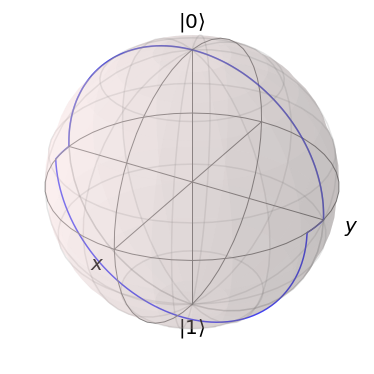

In [22]:
# Bloch Sphere #


t = tau1+tau2+tau3+tau4+tau5
step = step1+step2+step3+step4+step5
tlist = linspace(0,t,step) #总时长

# expectation for different coordinate #

t_state_expect = zeros((3,step))
for co_num in range(3):
    temp1 = append(t_state_expect1[co_num],t_state_expect2[co_num])
    temp2 = append(temp1,t_state_expect3[co_num])
    temp3 = append(temp2,t_state_expect4[co_num])
    t_state_expect[co_num] = append(temp3,t_state_expect5[co_num])

sphere=Bloch()
sphere.add_points([t_state_expect[0],t_state_expect[1],t_state_expect[2]], meth='l')
#sphere.vector_color = ['r']
#sphere.add_vectors([sin(theta),0,cos(theta)])
sphere.show()